In [1]:
from os import path
import pandas as pd
data_folder = path.join('..', '数据', '饱和蒸汽压')
raw_data = pd.read_csv(path.join(data_folder, '饱和蒸汽压.csv'), index_col=0)
raw_data

,E1,E2
t,,
25,-94.67,-94.69
30,-92.75,-92.77
35,-90.29,-90.29
40,-86.66,-86.67
45,-81.57,-81.55
50,-76.69,-76.74


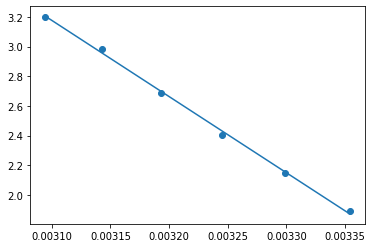

In [24]:
p0 = 101.325 # kPa
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy import constants
E = (raw_data['E1'] + raw_data['E2']).to_numpy() / 2
model = linear_model.LinearRegression()
x = 1 / (raw_data.index.to_numpy() + 273.15)
y = np.log(p0 + E)
model.fit(x.reshape(-1, 1), y)
x_fit = np.linspace(x.min(), x.max(), 10)
y_pred = model.predict(x_fit.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(x_fit, y_pred)

In [27]:
k = model.coef_[0] # 直线斜率
b = model.intercept_ # 直线截距
H = -k * constants.R
H # 单位：J/mol

42738.91791021769

In [30]:
-k / (b - np.log(p0)) - 273.15

81.51057718350864